# Primer Parcial

### Estudiante: Cruz Grimaldez Richard Ausberto

https://github.com/richardcruz98/Inteligencia-Artificial-I/blob/master/Parciales/Parcial1.ipynb

Escogi el dataset 241, Japanese Characters, este dataset contiene imagenes 28*28px de 10 caracteres japoneses:

Aa ; Ka ; Sa ; Ta ; Na ; Ha ; Ma ; Ya ; Ra ; Wa.

Este dataset cuenta con 60000 datos para entrenamiento y 10000 daatos para pureba, en 2 diferentes archivos csv

In [13]:
#Lo primero siempre, importar las librerias numpy, para los datos y matplotlib para las imagenes.
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

from scipy.ndimage import rotate

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
# Ingresar imágenes de dígitos de 20x20
input_layer_size  = 784 #28*28pixeles

# 10 etiquetas, por los 10 caracteres japoneses
num_labels = 10

#  datos de entrenamiento almacenados en los arreglos X, y
data = np.loadtxt('./train_data.csv', delimiter=',', skiprows=1) 

# Separar las etiquetas de los datos de las imágenes
x = data[:, 2:].reshape(-1, 28, 28)
y = data[:, 1]

# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
y[y == 10] = 0

m = y.size

## Punto 1: Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.

In [15]:
mapa_caracteristicas = {
    0: ['Aa', 'あ', 2, 'Horizontal', 'Oval', 'Línea curva cerrada', 'Sí'],
    1: ['Ka', 'か', 3, 'Vertical', 'Angular', 'Línea vertical, dos líneas horizontales cortas', 'No'],
    2: ['Sa', 'さ', 2, 'Vertical', 'Curva', 'Línea curva larga, línea corta recta', 'No'],
    3: ['Ta', 'た', 4, 'Vertical', 'Mixta', 'Línea vertical, dos líneas horizontales, curva corta', 'No'],
    4: ['Na', 'な', 3, 'Horizontal', 'Curva', 'Línea curva, línea vertical corta, línea corta horizontal', 'No'],
    5: ['Ha', 'は', 3, 'Horizontal', 'Mixta', 'Línea curva larga, dos líneas cortas', 'No'],
    6: ['Ma', 'ま', 3, 'Vertical', 'Curva', 'Línea curva, línea recta vertical, curva corta', 'Sí'],
    7: ['Ya', 'や', 2, 'Vertical', 'Curva', 'Línea curva larga, línea recta corta', 'No'],
    8: ['Ra', 'ら', 2, 'Horizontal', 'Curva', 'Línea curva larga, línea corta recta', 'No'],
    9: ['Wa', 'わ', 2, 'Vertical', 'Mixta', 'Línea curva larga, línea corta recta', 'Sí']
}

In [16]:
# Añadir las nuevas columnas basadas en el mapeo según el label
caracteristicas_adicionales = np.array([mapa_caracteristicas[int(label)] for label in y])

# Crear el nuevo dataset combinando las características adicionales con las imágenes
dataset_con_nuevas_columnas = np.hstack([np.arange(1, m + 1).reshape(-1, 1), y.reshape(-1, 1), caracteristicas_adicionales, data[:, 2:]])


In [17]:
# Mostrar algunas filas del dataset final
print(dataset_con_nuevas_columnas[:10, :12])

[['1' '8.0' 'Ra' 'ら' '2' 'Horizontal' 'Curva'
  'Línea curva larga, línea corta recta' 'No' '0.0' '0.0' '0.0']
 ['2' '7.0' 'Ya' 'や' '2' 'Vertical' 'Curva'
  'Línea curva larga, línea recta corta' 'No' '0.0' '0.0' '0.0']
 ['3' '0.0' 'Aa' 'あ' '2' 'Horizontal' 'Oval' 'Línea curva cerrada' 'Sí'
  '0.0' '0.0' '0.0']
 ['4' '1.0' 'Ka' 'か' '3' 'Vertical' 'Angular'
  'Línea vertical, dos líneas horizontales cortas' 'No' '0.0' '0.0' '0.0']
 ['5' '4.0' 'Na' 'な' '3' 'Horizontal' 'Curva'
  'Línea curva, línea vertical corta, línea corta horizontal' 'No' '0.0'
  '0.0' '0.0']
 ['6' '2.0' 'Sa' 'さ' '2' 'Vertical' 'Curva'
  'Línea curva larga, línea corta recta' 'No' '0.0' '0.0' '0.0']
 ['7' '4.0' 'Na' 'な' '3' 'Horizontal' 'Curva'
  'Línea curva, línea vertical corta, línea corta horizontal' 'No' '0.0'
  '0.0' '0.0']
 ['8' '8.0' 'Ra' 'ら' '2' 'Horizontal' 'Curva'
  'Línea curva larga, línea corta recta' 'No' '0.0' '0.0' '0.0']
 ['9' '1.0' 'Ka' 'か' '3' 'Vertical' 'Angular'
  'Línea vertical, dos líneas ho

## Punto 2: Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [18]:
# Duplicar ejemplos con rotaciones solo para un subconjunto
duplicados = []
num_a_duplicar = min(m, 10000)  # Limitar a 10,000 ejemplos para evitar uso excesivo de memoria

for i in range(num_a_duplicar):
    ejemplo = dataset_con_nuevas_columnas[i]
    
    # Obtener la parte de píxeles
    imagen = ejemplo[9:].astype(float).reshape(28, 28)  # Asegurarse de que sea tipo float
    
    # Crear variaciones rotadas
    for angulo in [15, -15]:  # Rotar 15 grados en ambas direcciones
        variacion = ejemplo.copy()
        
        # Rotar la imagen (píxeles)
        imagen_rotada = rotate(imagen, angle=angulo, reshape=False, order=1)
        
        # Aplanar la imagen rotada para mantener la estructura del dataset
        variacion[9:] = imagen_rotada.flatten()
        
        duplicados.append(ejemplo)  # Original
        duplicados.append(variacion)  # Variación rotada

# Convertir a array
dataset_duplicado = np.array(duplicados)

# Mostrar algunas filas del nuevo dataset
print(dataset_duplicado[:10, :8])  # Mostrar las primeras 10 filas y 8 columnas
print("Número total de ejemplos en el dataset duplicado:", dataset_duplicado.shape[0])



[['1' '8.0' 'Ra' 'ら' '2' 'Horizontal' 'Curva'
  'Línea curva larga, línea corta recta']
 ['1' '8.0' 'Ra' 'ら' '2' 'Horizontal' 'Curva'
  'Línea curva larga, línea corta recta']
 ['1' '8.0' 'Ra' 'ら' '2' 'Horizontal' 'Curva'
  'Línea curva larga, línea corta recta']
 ['1' '8.0' 'Ra' 'ら' '2' 'Horizontal' 'Curva'
  'Línea curva larga, línea corta recta']
 ['2' '7.0' 'Ya' 'や' '2' 'Vertical' 'Curva'
  'Línea curva larga, línea recta corta']
 ['2' '7.0' 'Ya' 'や' '2' 'Vertical' 'Curva'
  'Línea curva larga, línea recta corta']
 ['2' '7.0' 'Ya' 'や' '2' 'Vertical' 'Curva'
  'Línea curva larga, línea recta corta']
 ['2' '7.0' 'Ya' 'や' '2' 'Vertical' 'Curva'
  'Línea curva larga, línea recta corta']
 ['3' '0.0' 'Aa' 'あ' '2' 'Horizontal' 'Oval' 'Línea curva cerrada']
 ['3' '0.0' 'Aa' 'あ' '2' 'Horizontal' 'Oval' 'Línea curva cerrada']]
Número total de ejemplos en el dataset duplicado: 40000


## Punto 3: Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado.

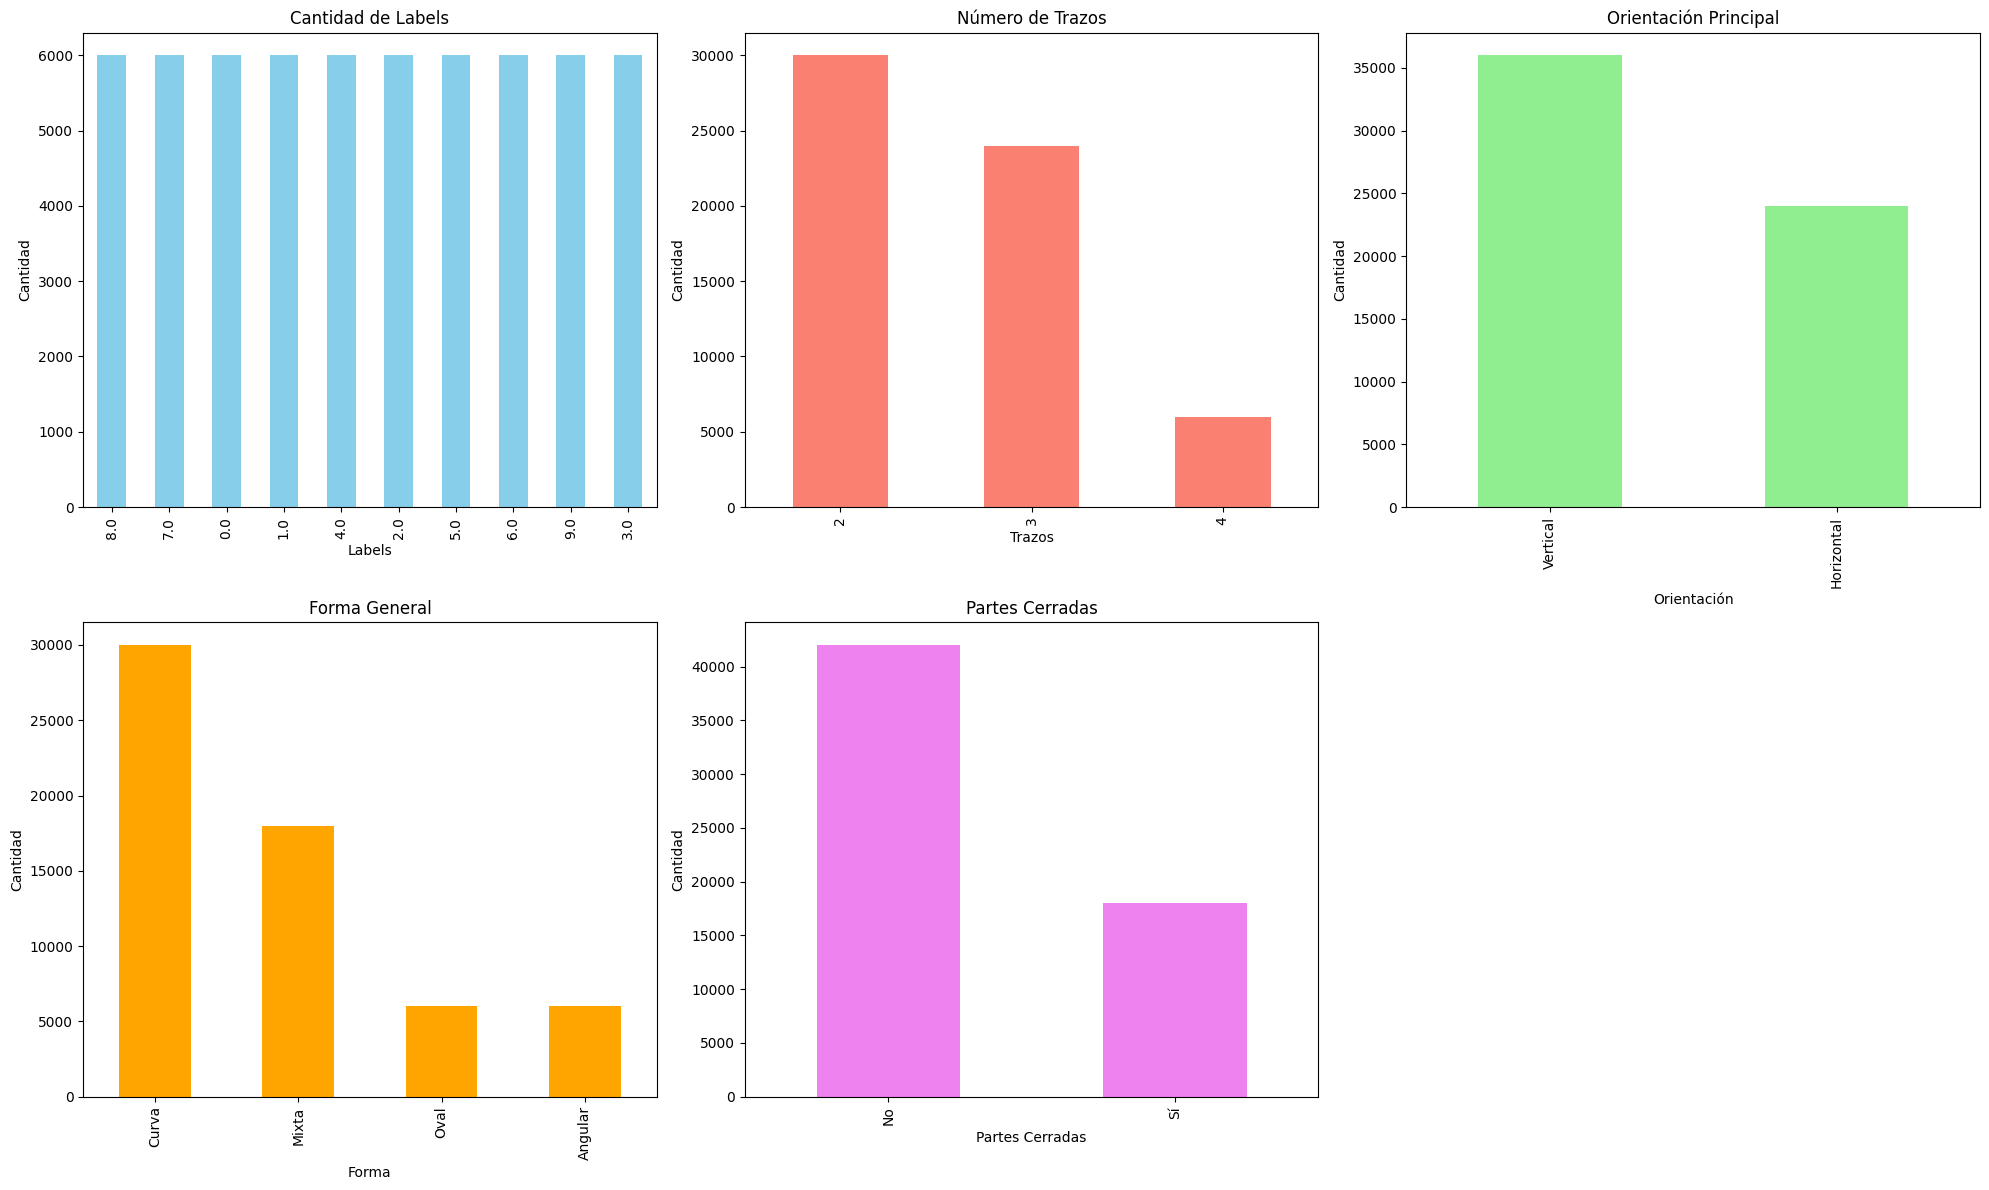

In [19]:
# Crear un DataFrame desde el dataset inicial
df_inicial = pd.DataFrame(dataset_con_nuevas_columnas)

# Renombrar las columnas para facilitar el acceso
df_inicial.columns = ['ID', 'Label', 'Nombre', 'Caracter', 'Trazos', 'Orientacion', 'Forma', 'Caracteristicas','Partes_Cerradas'] + [f'Pixel_{i}' for i in range(784)]

# Contar la cantidad de cada label
conteo_labels = df_inicial['Label'].value_counts()

# Contar la cantidad de trazos
conteo_trazos = df_inicial['Trazos'].value_counts()

# Contar la orientación principal
conteo_orientacion = df_inicial['Orientacion'].value_counts()

# Contar la forma general
conteo_forma = df_inicial['Forma'].value_counts()

# Contar partes cerradas
conteo_partes = df_inicial['Partes_Cerradas'].value_counts()

# Crear gráficos
pyplot.figure(figsize=(20, 12))

# Gráfico 1: Cantidad de etiquetas
pyplot.subplot(2, 3, 1)
conteo_labels.plot(kind='bar', color='skyblue')
pyplot.title('Cantidad de Labels')
pyplot.xlabel('Labels')
pyplot.ylabel('Cantidad')

# Gráfico 2: Número de trazos
pyplot.subplot(2, 3, 2)
conteo_trazos.plot(kind='bar', color='salmon')
pyplot.title('Número de Trazos')
pyplot.xlabel('Trazos')
pyplot.ylabel('Cantidad')

# Gráfico 3: Orientación principal
pyplot.subplot(2, 3, 3)
conteo_orientacion.plot(kind='bar', color='lightgreen')
pyplot.title('Orientación Principal')
pyplot.xlabel('Orientación')
pyplot.ylabel('Cantidad')

# Gráfico 4: Forma general
pyplot.subplot(2, 3, 4)
conteo_forma.plot(kind='bar', color='orange')
pyplot.title('Forma General')
pyplot.xlabel('Forma')
pyplot.ylabel('Cantidad')

# Gráfico 5: Partes Cerradas
pyplot.subplot(2, 3, 5)
conteo_partes.plot(kind='bar', color='violet')
pyplot.title('Partes Cerradas')
pyplot.xlabel('Partes Cerradas')
pyplot.ylabel('Cantidad')

pyplot.tight_layout()
pyplot.show()

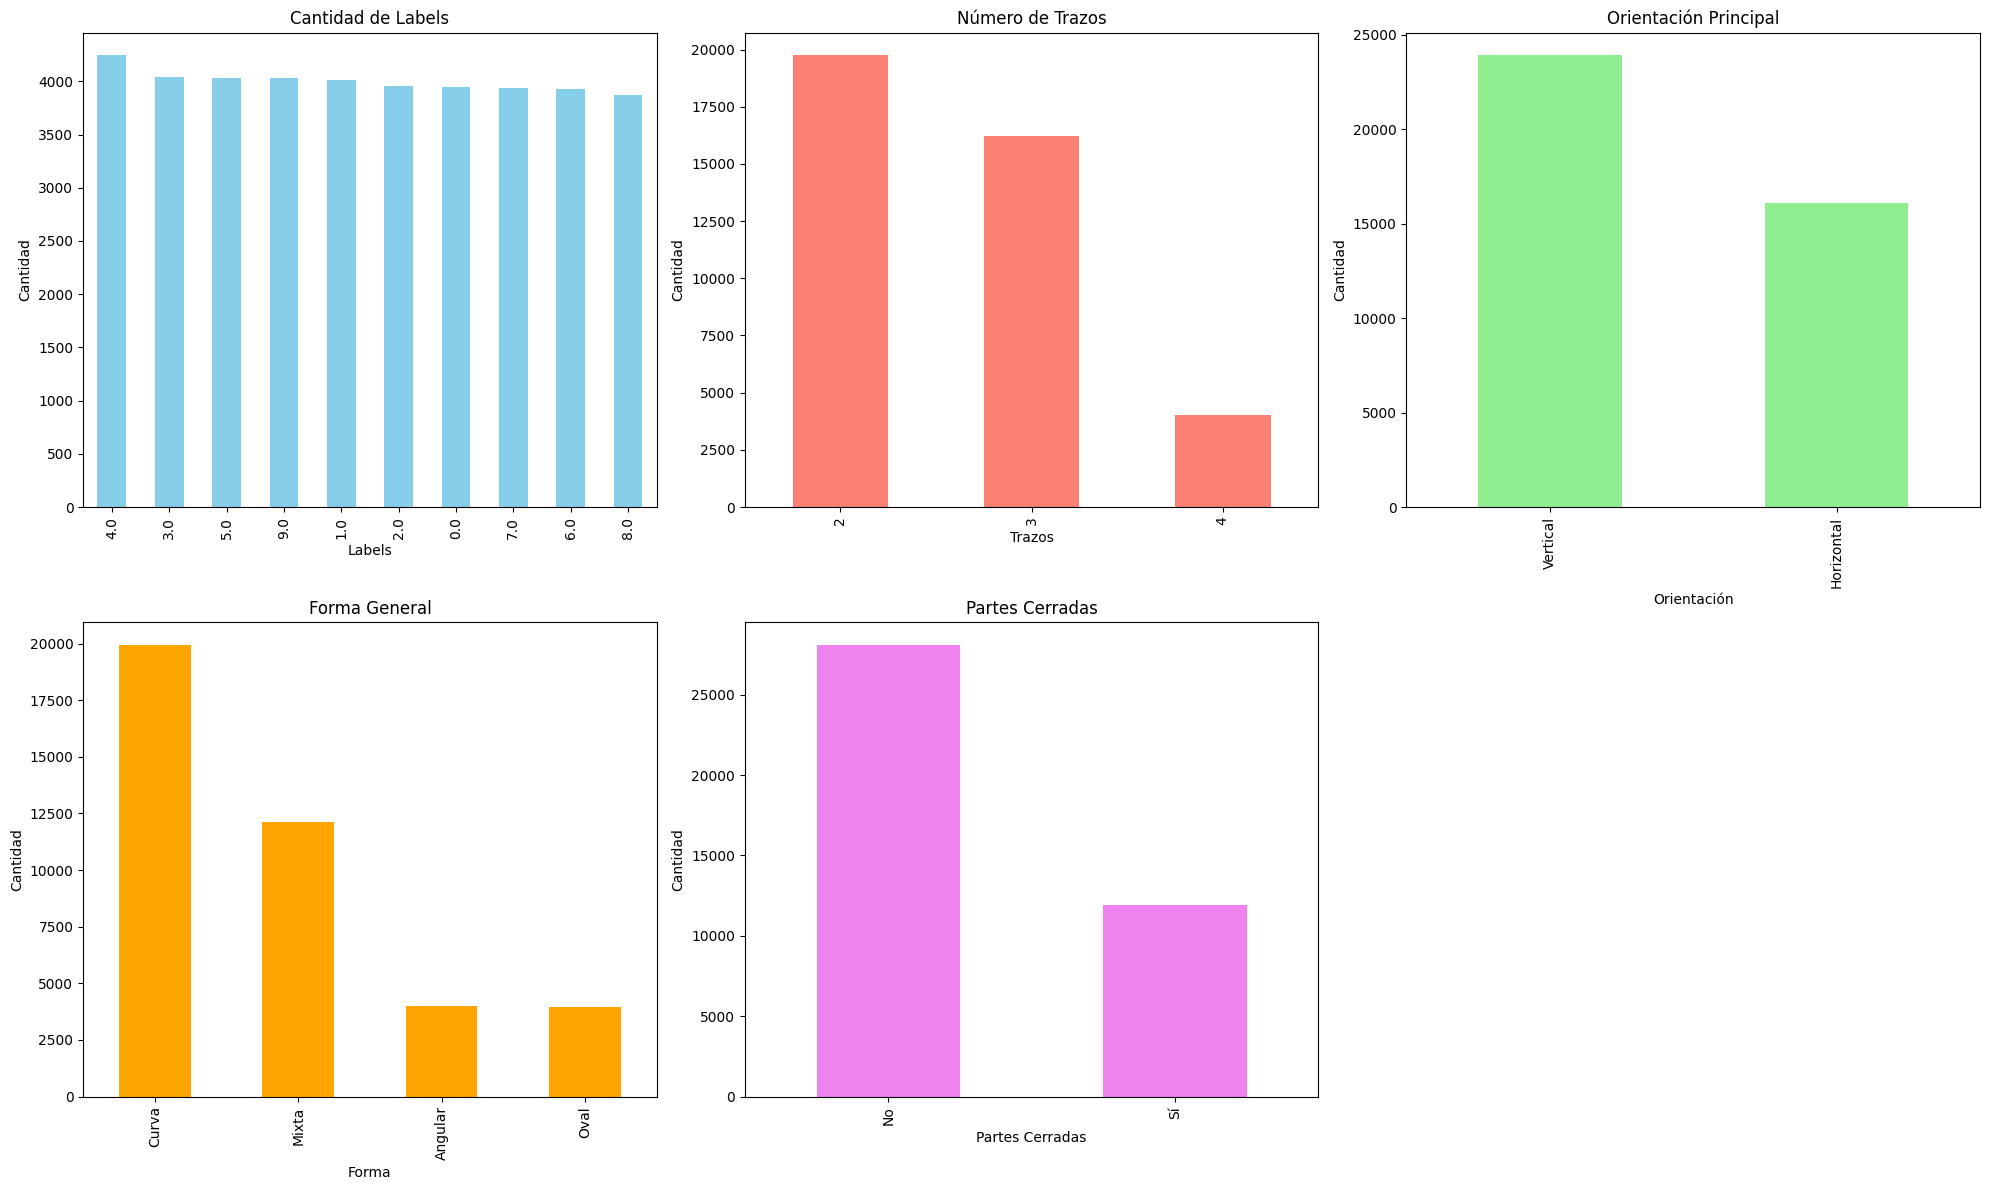

In [20]:
# Crear un DataFrame desde el dataset inicial
df_inicial = pd.DataFrame(dataset_duplicado)

# Renombrar las columnas para facilitar el acceso
df_inicial.columns = ['ID', 'Label', 'Nombre', 'Caracter', 'Trazos', 'Orientacion', 'Forma', 'Caracteristicas','Partes_Cerradas'] + [f'Pixel_{i}' for i in range(784)]

# Contar la cantidad de cada label
conteo_labels = df_inicial['Label'].value_counts()

# Contar la cantidad de trazos
conteo_trazos = df_inicial['Trazos'].value_counts()

# Contar la orientación principal
conteo_orientacion = df_inicial['Orientacion'].value_counts()

# Contar la forma general
conteo_forma = df_inicial['Forma'].value_counts()

# Contar partes cerradas
conteo_partes = df_inicial['Partes_Cerradas'].value_counts()

# Crear gráficos
pyplot.figure(figsize=(20, 12))

# Gráfico 1: Cantidad de etiquetas
pyplot.subplot(2, 3, 1)
conteo_labels.plot(kind='bar', color='skyblue')
pyplot.title('Cantidad de Labels')
pyplot.xlabel('Labels')
pyplot.ylabel('Cantidad')

# Gráfico 2: Número de trazos
pyplot.subplot(2, 3, 2)
conteo_trazos.plot(kind='bar', color='salmon')
pyplot.title('Número de Trazos')
pyplot.xlabel('Trazos')
pyplot.ylabel('Cantidad')

# Gráfico 3: Orientación principal
pyplot.subplot(2, 3, 3)
conteo_orientacion.plot(kind='bar', color='lightgreen')
pyplot.title('Orientación Principal')
pyplot.xlabel('Orientación')
pyplot.ylabel('Cantidad')

# Gráfico 4: Forma general
pyplot.subplot(2, 3, 4)
conteo_forma.plot(kind='bar', color='orange')
pyplot.title('Forma General')
pyplot.xlabel('Forma')
pyplot.ylabel('Cantidad')

# Gráfico 5: Partes Cerradas
pyplot.subplot(2, 3, 5)
conteo_partes.plot(kind='bar', color='violet')
pyplot.title('Partes Cerradas')
pyplot.xlabel('Partes Cerradas')
pyplot.ylabel('Cantidad')

pyplot.tight_layout()
pyplot.show()

## Punto 4: Dividir los datos del dataset sintético en datos de entrenamiento y prueba

In [98]:
df_duplicado = pd.read_csv('./dataset_duplicado.csv')

# Ver las primeras filas del DataFrame
print(df_duplicado.head())

# Separar las características y etiquetas
x = df_duplicado.iloc[:, 9:].values  # Asumiendo que las características comienzan desde la columna 9
y = df_duplicado.iloc[:, 1].values    # Asumiendo que las etiquetas están en la columna 1

   0    1   2  3  4           5      6                                     7  \
0  1  8.0  Ra  ら  2  Horizontal  Curva  Línea curva larga, línea corta recta   
1  1  8.0  Ra  ら  2  Horizontal  Curva  Línea curva larga, línea corta recta   
2  1  8.0  Ra  ら  2  Horizontal  Curva  Línea curva larga, línea corta recta   
3  1  8.0  Ra  ら  2  Horizontal  Curva  Línea curva larga, línea corta recta   
4  2  7.0  Ya  や  2    Vertical  Curva  Línea curva larga, línea recta corta   

    8    9  ...         783         784        785      786  787  788  789  \
0  No  0.0  ...  122.000000  255.000000  90.000000  0.00000  0.0  0.0  0.0   
1  No  0.0  ...    0.000000    0.000000   0.000000  0.00000  0.0  0.0  0.0   
2  No  0.0  ...  122.000000  255.000000  90.000000  0.00000  0.0  0.0  0.0   
3  No  0.0  ...  139.912726   57.511765  20.076839  6.41489  0.0  0.0  0.0   
4  No  0.0  ...    0.000000    0.000000   0.000000  0.00000  0.0  0.0  0.0   

   790  791  792  
0  0.0  0.0  0.0  
1  0.0  0.0 

In [22]:
#df_duplicado = pd.DataFrame(dataset_duplicado)
#df_duplicado.to_csv('dataset_duplicado.csv', index=False)


## Punto 5: Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

In [23]:
# Convertir "Sí" a 1 y "No" a 0 en la columna de etiquetas
z = df_duplicado.iloc[:, 8].values  # Asegúrate de que la columna 8 contiene las etiquetas
z_numeric = np.where(z == "Sí", 1, 0)


# Dividir el dataset en entrenamiento y prueba
X_train, X_test, z_train, z_test = train_test_split(x, z_numeric, test_size=0.2, random_state=42)

# Verifica las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} ejemplos")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} ejemplos")

Tamaño del conjunto de entrenamiento: 32000 ejemplos
Tamaño del conjunto de prueba: 8000 ejemplos


In [24]:
def sigmoid1(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy

    z = np.clip(z, -500, 500)  # Limitar los valores extremos
    
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [25]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_train], axis=1)

print(X[5])

[  1.   0.   0.   0.   0.   0.   0.   0.   0.   1. 130. 197.  41.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  87. 234.  28.   0.  45.
  39.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   5. 203. 159.   1.   0. 185.
 247. 196.  32.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   3. 164.  55.   0.   0. 196.
 250. 232.  41.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   1. 139. 206.  70.  44. 219.
 228.  88.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.  44. 189. 180. 190. 182.
 103.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.  20. 227.
 126.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [26]:
def calcularCosto(theta, X, y):
    m = len(y)
    h = sigmoid1(np.dot(X, theta))
    
    # Clipping de h
    h = np.clip(h, 1e-15, 1 - 1e-15)
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [27]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid1(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

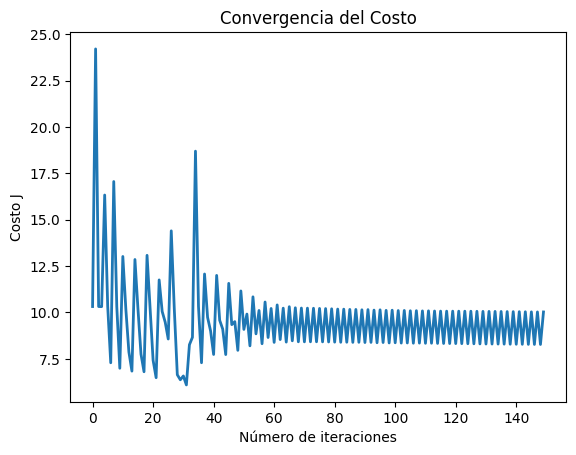

theta calculado por el descenso por el gradiente: [ 1.65242072e-03  4.19703171e-03  4.00505542e-03 -7.97066223e-04
  2.90631064e-02  3.10031159e-02  3.52661267e-02  4.88690637e-02
  3.56965768e-02  1.02513257e-02 -1.84281737e-02 -4.66698429e-02
  1.74989945e-02  5.86272156e-03  6.12449914e-03  1.78394704e-02
  5.67376341e-02  6.64210603e-02  4.38269018e-02  2.36380072e-02
  2.32762577e-02  3.47001150e-02  4.79802538e-02  4.99871804e-02
  7.32663369e-03  1.57534010e-03  4.31398939e-04  8.20061256e-04
  2.81426133e-03  1.00282106e-02  8.32382427e-03  3.22872019e-02
  4.52028527e-02  4.27989152e-02  5.53844309e-02  6.57555821e-02
 -3.51842399e-02 -4.19579559e-02 -4.51329508e-02 -1.73079887e-02
 -1.73130035e-02 -4.04639278e-02 -1.96320537e-02 -2.45121597e-02
 -8.05263723e-03  7.90948680e-03 -1.26197008e-02 -1.84029922e-02
 -7.77167076e-03  8.22763525e-03  5.14679186e-02  7.81151006e-02
  6.14441073e-02  1.88842521e-02  1.02663252e-02  1.48835787e-03
  6.28360579e-03  1.27112530e-02  1.7382

In [28]:
alpha = 0.001
num_iters = 150

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X_train.shape[1])  # Asegúrate de que theta tenga la longitud correcta
theta, J_history = descensoGradiente(theta, X_train, z_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Costo')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {}'.format(theta))

# Predecir en X_test
predicciones = sigmoid1(np.dot(X_test, theta))  # Asegúrate de usar X_test
predicciones_clasificadas = np.where(predicciones >= 0.5, 1, 0)  # Umbral para clasificar

# Calcular la precisión
precision = np.mean(predicciones_clasificadas == z_test) * 100
print(f'Precisión en el conjunto de prueba: {precision:.2f}%')

In [29]:
def predict(theta, X):
    
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid1(X.dot(theta.T)))
    return p

In [30]:
p_test = predict(theta, X_test)
print('Precisión en el conjunto de prueba: {:.2f} %'.format(np.mean(p_test == z_test) * 100))

Precisión en el conjunto de prueba: 67.40 %


In [31]:
'''# Duplicar ejemplos con rotaciones solo para un subconjunto
duplicados = []
num_a_duplicar = min(m, 10000)  # Limitar a 10,000 ejemplos para evitar uso excesivo de memoria

for i in range(num_a_duplicar):
    ejemplo = dataset_con_nuevas_columnas[i]
    
    # Obtener la parte de píxeles
    imagen = ejemplo[9:].astype(float).reshape(28, 28)  # Asegurarse de que sea tipo float
    
    # Crear variaciones rotadas
    for angulo in [15, -15]:  # Rotar 15 grados en ambas direcciones
        variacion = ejemplo.copy()
        
        # Rotar la imagen (píxeles)
        imagen_rotada = rotate(imagen, angle=angulo, reshape=False, order=1)
        
        # Aplanar la imagen rotada para mantener la estructura del dataset
        variacion[9:] = imagen_rotada.flatten()
        
        duplicados.append(ejemplo)  # Original
        duplicados.append(variacion)  # Variación rotada

# Convertir a array
dataset_duplicado = np.array(duplicados)

# Mostrar algunas filas del nuevo dataset
print(dataset_duplicado[:10, :8])  # Mostrar las primeras 10 filas y 8 columnas
print("Número total de ejemplos en el dataset duplicado:", dataset_duplicado.shape[0])
'''


'# Duplicar ejemplos con rotaciones solo para un subconjunto\nduplicados = []\nnum_a_duplicar = min(m, 10000)  # Limitar a 10,000 ejemplos para evitar uso excesivo de memoria\n\nfor i in range(num_a_duplicar):\n    ejemplo = dataset_con_nuevas_columnas[i]\n    \n    # Obtener la parte de píxeles\n    imagen = ejemplo[9:].astype(float).reshape(28, 28)  # Asegurarse de que sea tipo float\n    \n    # Crear variaciones rotadas\n    for angulo in [15, -15]:  # Rotar 15 grados en ambas direcciones\n        variacion = ejemplo.copy()\n        \n        # Rotar la imagen (píxeles)\n        imagen_rotada = rotate(imagen, angle=angulo, reshape=False, order=1)\n        \n        # Aplanar la imagen rotada para mantener la estructura del dataset\n        variacion[9:] = imagen_rotada.flatten()\n        \n        duplicados.append(ejemplo)  # Original\n        duplicados.append(variacion)  # Variación rotada\n\n# Convertir a array\ndataset_duplicado = np.array(duplicados)\n\n# Mostrar algunas fila

## Punto 6: Entrenar un modelo One-vs-All para reemplazar el modelo desarrollado en los puntos 5 y 6.

In [35]:

def displayData(X, figsize=(10, 10)):
    m, n = X.shape
    example_width = int(np.round(np.sqrt(n)))  # Suponiendo que las imágenes son cuadradas
    example_height = n // example_width
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    ax_array = ax_array.flatten()

    for i in range(display_rows * display_cols):
        if i < m:
            ax_array[i].imshow(X[i].reshape(example_height, example_width), cmap='Greys', extent=[0, 1, 0, 1])
        ax_array[i].axis('off')

    pyplot.show()

In [99]:
y = df_duplicado.iloc[:, 1].values  


# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verifica las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} ejemplos")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} ejemplos")

m = y_train.size

Tamaño del conjunto de entrenamiento: 32000 ejemplos
Tamaño del conjunto de prueba: 8000 ejemplos


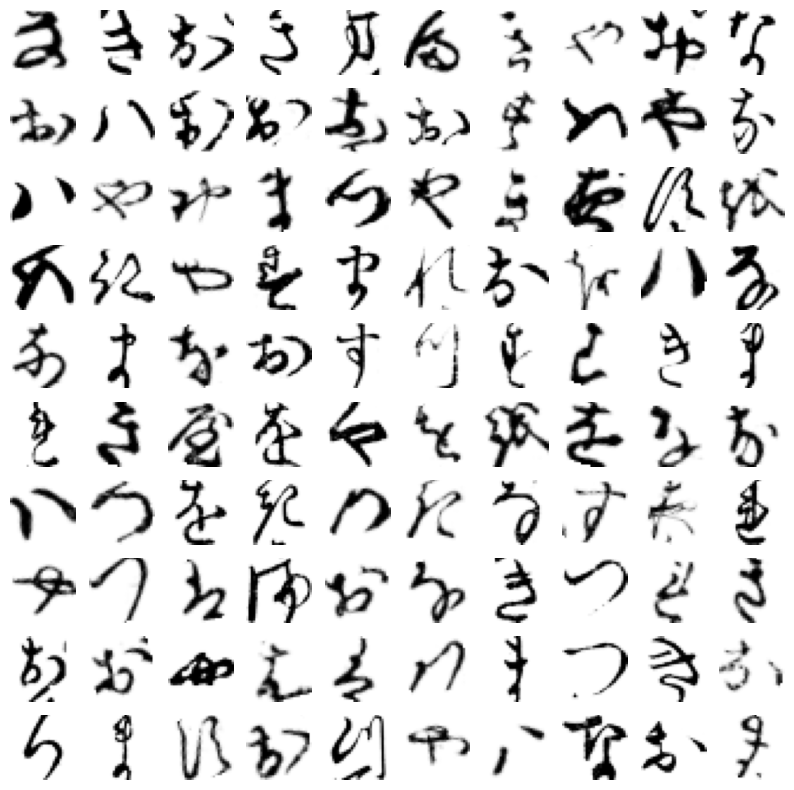

In [36]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X_train[rand_indices, :]

displayData(sel)

In [64]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [65]:
def sigmoid(z):
    # Clipping para evitar overflow y division por cero
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

In [66]:
def lrCostFunction(theta, X, y, lambda_):

    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    # grad = (1 / m) * (h - y).dot(X)
    # grad = grad + (lambda_ / m) * temp

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad

In [70]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]')

Costo         : 3.085728
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.355376, -0.491709, 0.885979, 1.663668]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [73]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Entrena múltiples clasificadores de regresión logística para un problema de clasificación multiclase.
    """

    # Inicializar variables útiles
    m, n = X.shape  # Solo dos dimensiones: ejemplos y características
    # Si tienes imágenes de 28x28, puedes definir `height` y `width` así
    height = 28
    width = 28

    # Aplanar las matrices de 28x28 en vectores de 784 elementos
    X = X.reshape(m, height * width)

    # Agregar unos a la matriz X
    X = np.hstack((np.ones((m, 1)), X))

    # Inicializa los parámetros theta
    all_theta = np.zeros((num_labels, n + 1))

    # Entrena un clasificador para cada clase
    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction, initial_theta, (X, (y == c), lambda_), jac=True, method='CG', options=options)
        all_theta[c] = res.x

    return all_theta

In [74]:
lambda_ = 0.001
all_theta = oneVsAll(X_train, y_train, num_labels, lambda_)

In [ ]:
print(all_theta.shape)
print(all_theta[0])

(10, 785)
[-3.87336234e-04  2.11299254e-05  6.91190092e-05 -1.38441385e-04
 -2.87055811e-04 -1.36006794e-03 -1.24951372e-03 -1.08502032e-03
 -7.85366580e-04 -8.28101161e-04  7.84157484e-04  3.25343205e-04
 -1.13455517e-03 -1.97507257e-03 -2.13029628e-03 -2.70634355e-03
 -3.27916022e-03  3.21398956e-04  1.03480910e-03  5.71632412e-04
 -1.36238722e-05  2.63071269e-04  6.31776743e-04  1.73605457e-03
  2.29492922e-03  4.77626732e-04  3.41818386e-04  1.30889875e-04
  5.22680190e-05  2.06931068e-04  1.76412016e-04  2.16887080e-04
 -2.19774061e-04 -5.97218245e-04  1.53834785e-04  1.83517165e-03
  1.72927637e-03 -1.41109446e-03 -6.78346549e-04 -1.90455996e-03
 -7.65556824e-04 -6.56454001e-04 -1.08725273e-03 -1.00578616e-03
 -1.06226861e-03 -6.06236798e-04 -6.46818578e-04 -1.69388249e-03
 -1.86696656e-03 -1.14095533e-03 -4.59909523e-04  7.95315079e-04
  1.99560887e-03  2.00642525e-03  6.81062033e-04  6.34791037e-04
  1.77259959e-04  5.78857265e-05  9.50193300e-05  1.34634498e-04
 -3.27650205e-0

In [75]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0]
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

(32000, 784)
Precisión del conjunto de entrenamiento: 77.04%
[8 1 5 6 9 6 3 6 5 3 2 8 7 0 6 7 9 0 5 9 2 4 8 0 8 0 8 9 6 2 8 9 4 7 7 4 1
 4 3 3 1 4 3 1 9 3 9 3 7 6 3 2 3 5 5 9 6 9 1 1 0 2 4 9 7 8 6 9 6 9 5 4 1 9
 7 1 3 7 9 5 6 2 9 0 8 2 7 2 8 1 3 8 9 0 2 0 4 9 6 1] ['Ra', 'Ka', 'Ha', 'Ma', 'Wa', 'Na', 'Ta', 'Sa', 'Ha', 'Ta', 'Sa', 'Ra', 'Sa', 'Aa', 'Sa', 'Ya', 'Wa', 'Aa', 'Ha', 'Ka', 'Ya', 'Na', 'Ta', 'Aa', 'Wa', 'Aa', 'Sa', 'Wa', 'Sa', 'Sa', 'Ta', 'Wa', 'Na', 'Aa', 'Ya', 'Na', 'Sa', 'Na', 'Ta', 'Ta', 'Ka', 'Na', 'Ta', 'Na', 'Wa', 'Ta', 'Wa', 'Ta', 'Ya', 'Ma', 'Aa', 'Sa', 'Ta', 'Ha', 'Ha', 'Wa', 'Ma', 'Wa', 'Ka', 'Wa', 'Aa', 'Sa', 'Na', 'Wa', 'Ta', 'Ra', 'Ha', 'Wa', 'Ma', 'Wa', 'Ha', 'Sa', 'Ka', 'Aa', 'Ya', 'Ka', 'Ta', 'Ya', 'Wa', 'Ha', 'Ma', 'Na', 'Wa', 'Ra', 'Ra', 'Sa', 'Ya', 'Ra', 'Ra', 'Ka', 'Ta', 'Ra', 'Ka', 'Aa', 'Sa', 'Aa', 'Na', 'Wa', 'Ma', 'Sa']


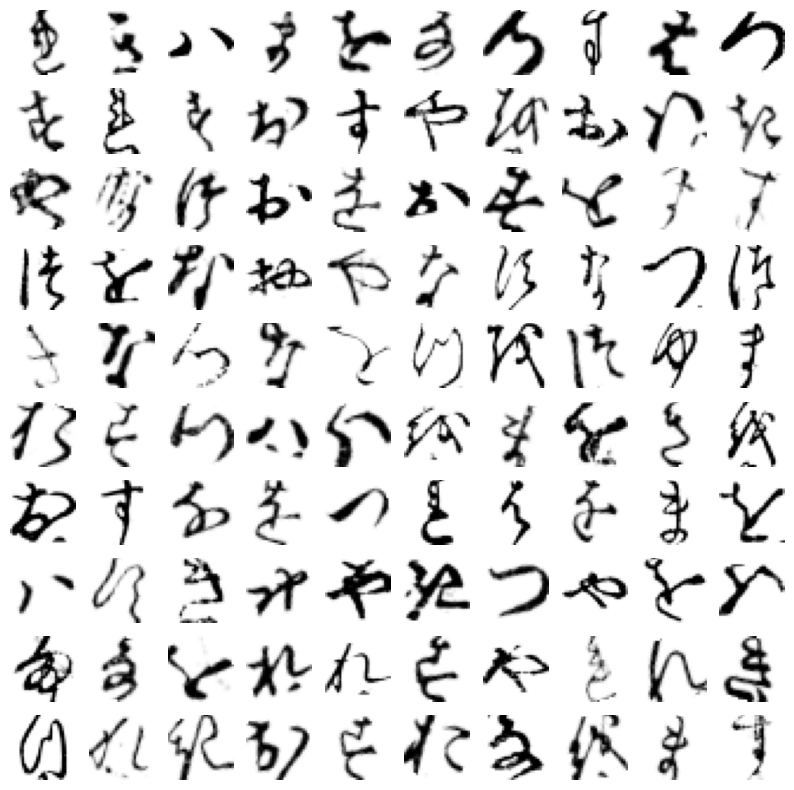

In [100]:
# Asegúrate de que X_test y y_test estén definidos y tengan las dimensiones correctas
print(X_train.shape)
X_train = X_train.reshape(-1, 28, 28)
m, height, width = X_train.shape
n = height * width  # Número de características después de aplanar

# Aplanar las matrices de 28x28 en vectores de 784 elementos
X = X_train.reshape(m, n)

# Predicción en el conjunto de entrenamiento
pred = predictOneVsAll(all_theta, X)
print('Precisión del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_train) * 100))

# Preparar X_test
X_test = X_test.reshape(-1, 28, 28)
m_test, _, _ = X_test.shape
X_test = X_test.reshape(m_test, n)  # Aplanar también X_test

# Agregar una columna de unos para el sesgo
X_test = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)

# Realizar predicciones en el conjunto de prueba
p = np.argmax(sigmoid(X_test.dot(all_theta.T)), axis=1)

# Convertir las predicciones a letras
numero_a_letra = {
    0: 'Aa', 1: 'Ka', 2: 'Sa', 3: 'Ta', 4: 'Na',
    5: 'Ha', 6: 'Ma', 7: 'Ya', 8: 'Ra', 9: 'Wa'
}

# Seleccionar 100 ejemplos del conjunto de prueba
indices = np.arange(len(y_test))  # Crear un rango de índices
np.random.shuffle(indices)  # Mezclar los índices
selected_indices = indices[:100]  # Seleccionar los primeros 100 índices

# Obtener las letras correspondientes a los índices seleccionados
letras = [numero_a_letra[num] for num in y_test[selected_indices]]

# Obtener los ejemplos seleccionados
X_selected = X_test[selected_indices]

print(p[selected_indices], letras)

# Visualizar los datos seleccionados
displayData(X_selected[:, 1:])  # Eliminar la columna de unos antes de mostrar
